# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [1]:
#Import all the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


In [2]:
pi_df = pd.read_csv('pima-indians-diabetes+%283%29.csv')

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [3]:
pi_df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [4]:
pi_df.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [5]:
pi_df.shape

(768, 9)

In [6]:
(pi_df['age']==0).sum()

0

In [7]:
cols = list(pi_df.columns)

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [8]:
columns_pi = ['Plas', 'Pres', 'skin', 'mass']
for x in columns_pi:
    pi_df[x]= pi_df[x].replace(0, pi_df[x].median())

# Q5 Print the descriptive statistics of each & every column using describe() function

In [9]:
pi_df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,79.799479,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,115.244002,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

Text(0, 0.5, 'Frequency')

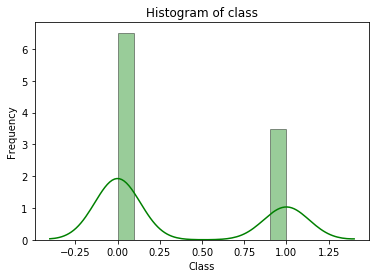

In [10]:
sns.distplot(pi_df['class'], hist=True, kde=True, bins=10, color='green', hist_kws={'edgecolor':'black'})
plt.title('Histogram of class')
plt.xlabel('Class')
plt.ylabel('Frequency')

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


C:\Users\Suhai\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Suhai\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


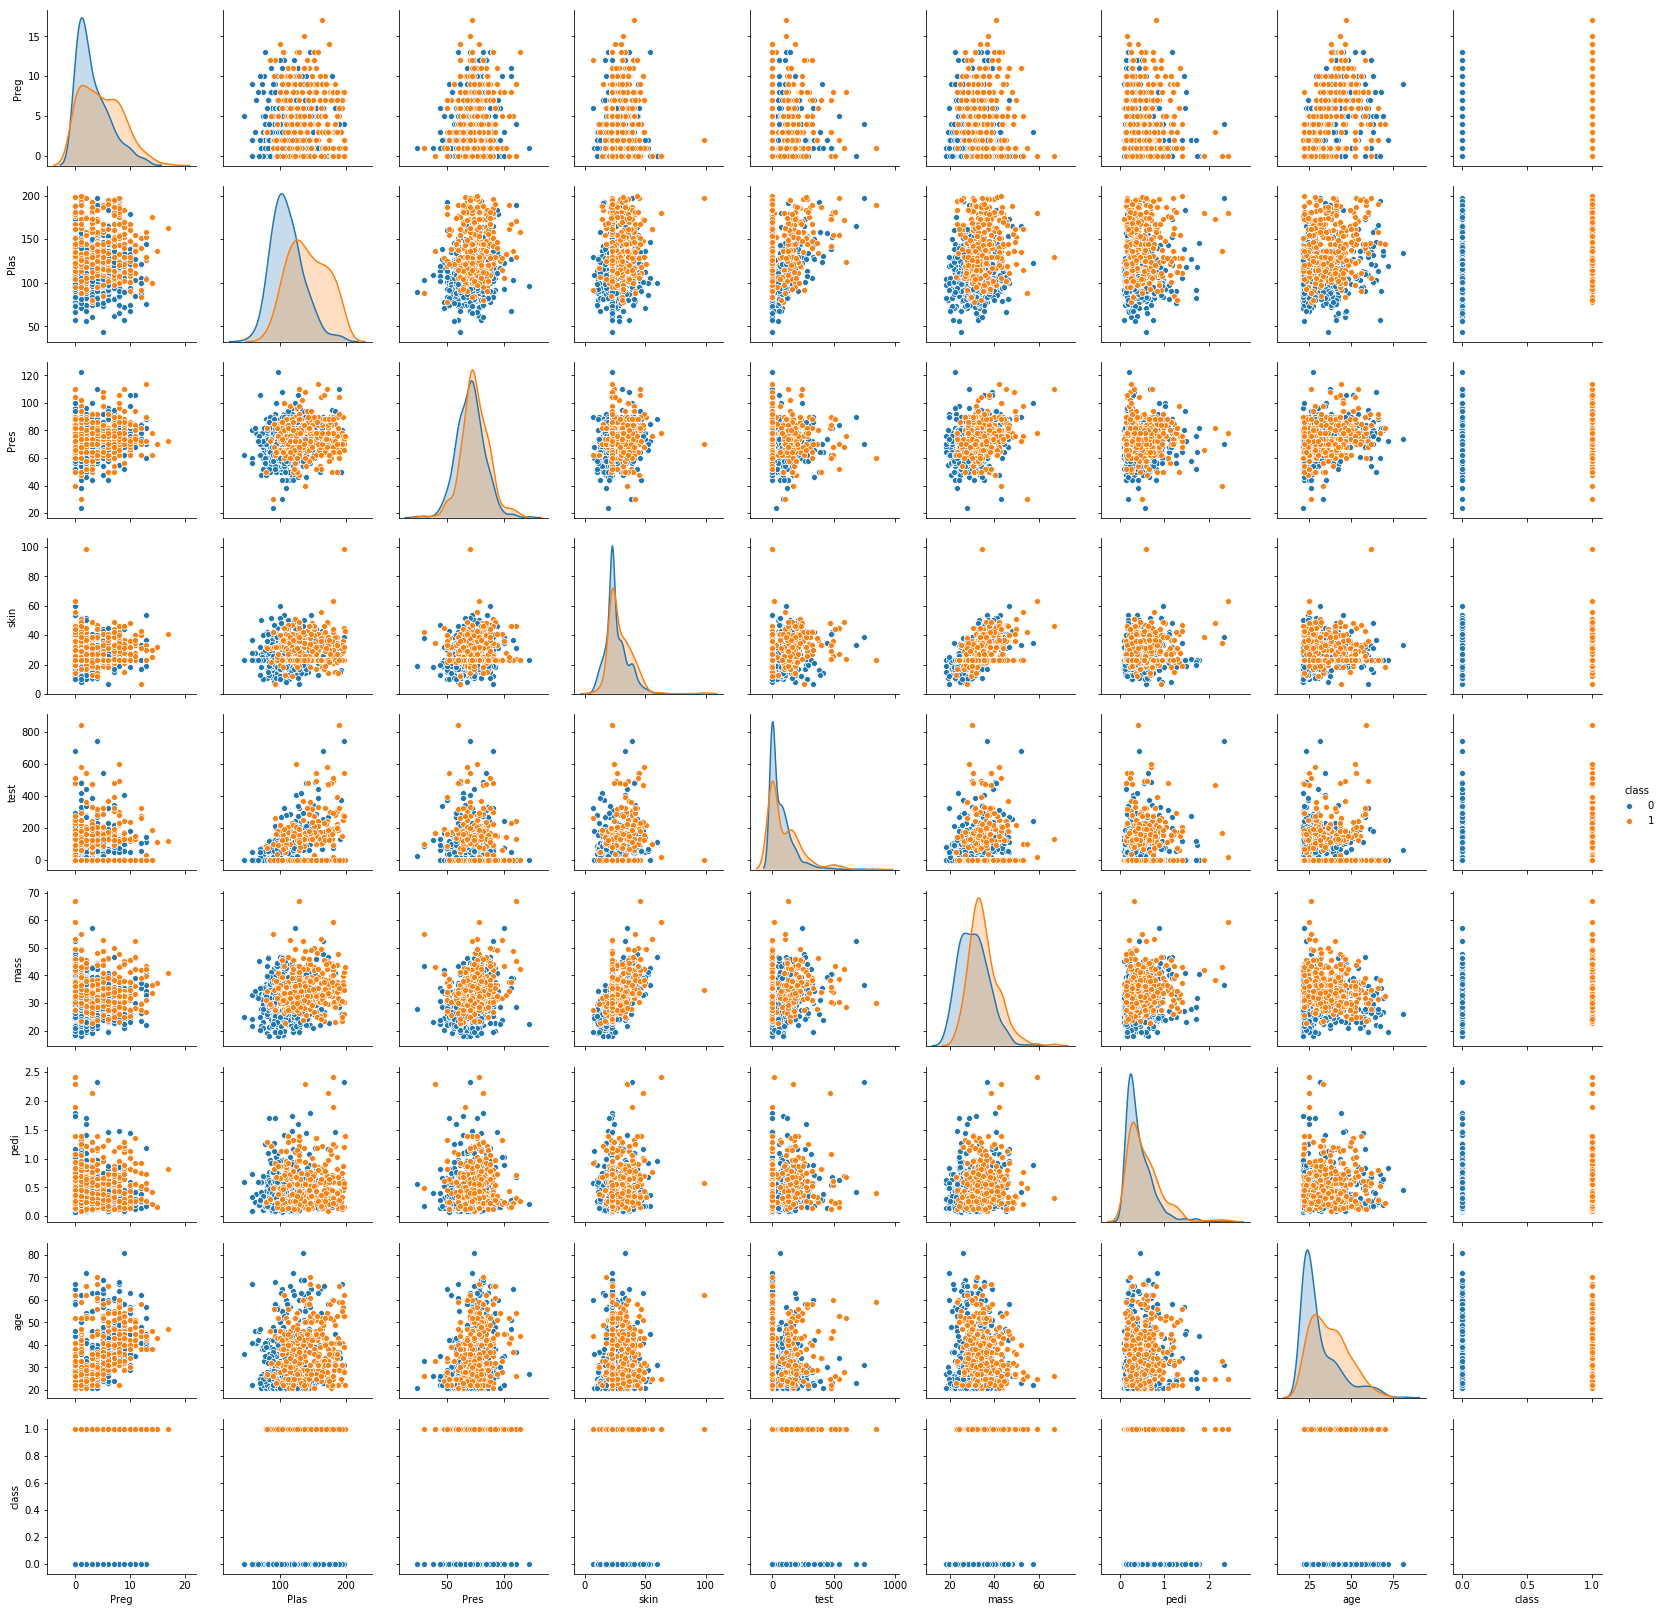

In [21]:
sns.pairplot(pi_df, hue = 'class')

Using the plot - infer the relationship between different variables

From the above pair plot we can see that there is no clear differentiation between class and pressure whereas with the other features there is a better seperation

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [22]:
x = pi_df.drop('class', axis=1)

In [23]:
y = pi_df['class']

In [24]:
train_set, test_set, train_label, test_label = train_test_split(x,y, test_size=0.3, random_state=7)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [25]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [26]:
dt_model.fit(train_set, train_label)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [27]:
y_predict = dt_model.predict(test_set)

In [28]:
print(f"Training model accuracy: {dt_model.score(train_set , train_label)}")
print(f"Test model accuracy: {dt_model.score(test_set , test_label)}")

Training model accuracy: 1.0
Test model accuracy: 0.7186147186147186


In [29]:
print(metrics.confusion_matrix(test_label, y_predict))

[[112  35]
 [ 30  54]]


Print the feature importance of the decision model - Optional

In [30]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))

           Imp
Preg  0.048315
Plas  0.296419
Pres  0.078956
skin  0.058709
test  0.062758
mass  0.195678
pedi  0.144889
age   0.114277
